In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data_class.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
#pip install --ignore-installed --upgrade tensorflow==1.14.0

In [4]:
#pip install keras

In [5]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [6]:
cnn = Sequential()

cnn.add(Dense(2, activation = 'relu', input_dim = 4))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Были проведены эксперименты с разными комбинациями слоёв, в результате пришли к такому набору, так как он дает наилучшие результаты.

In [7]:
import sys
sys.setrecursionlimit(10000)

In [8]:
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data=(X_test, y_test))

Train on 5728 samples, validate on 1432 samples
Epoch 1/100
5728/5728 [==============================] - 1s 92us/sample - loss: 0.6784 - acc: 0.6217 - val_loss: 0.6762 - val_acc: 0.6047
Epoch 2/100
5728/5728 [==============================] - 0s 54us/sample - loss: 0.6612 - acc: 0.6217 - val_loss: 0.6575 - val_acc: 0.6047
Epoch 3/100
5728/5728 [==============================] - 0s 51us/sample - loss: 0.6418 - acc: 0.6217 - val_loss: 0.6371 - val_acc: 0.6047
Epoch 4/100
5728/5728 [==============================] - 0s 42us/sample - loss: 0.6234 - acc: 0.6217 - val_loss: 0.6190 - val_acc: 0.6047
Epoch 5/100
5728/5728 [==============================] - 0s 51us/sample - loss: 0.6067 - acc: 0.6217 - val_loss: 0.6024 - val_acc: 0.6047
Epoch 6/100
5728/5728 [==============================] - 0s 51us/sample - loss: 0.5912 - acc: 0.6217 - val_loss: 0.5870 - val_acc: 0.6047
Epoch 7/100
5728/5728 [==============================] - 0s 51us/sample - loss: 0.5767 - acc: 0.6217 - val_loss: 0.5725 - va

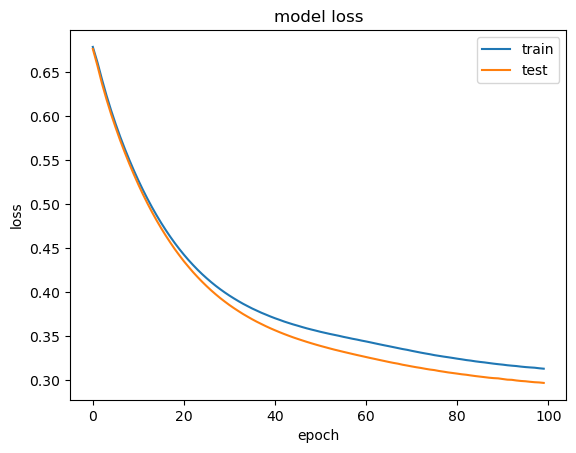

In [9]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Судя по графику можем сказать, что в моделе не наблюдается переобучение выборки.

In [10]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[788  78]
 [120 446]]


Здесь мы видим 198 неверно распознанных объектов. Тут также лучше распознаються клиенты, которие имеют слабую привязаность к сайту. Точность модели при этом осталась примерно такой же, как и у логистической модели, 0,86.

Таким образом, нельзя сделать окончательный вывод о том, какая модель лучше классифицирует выборку данных. 